## Perceptron Lernalgorithmus

Gewichtsvektor am Ende:
[-1.  1.  1.]
Auswertung:
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


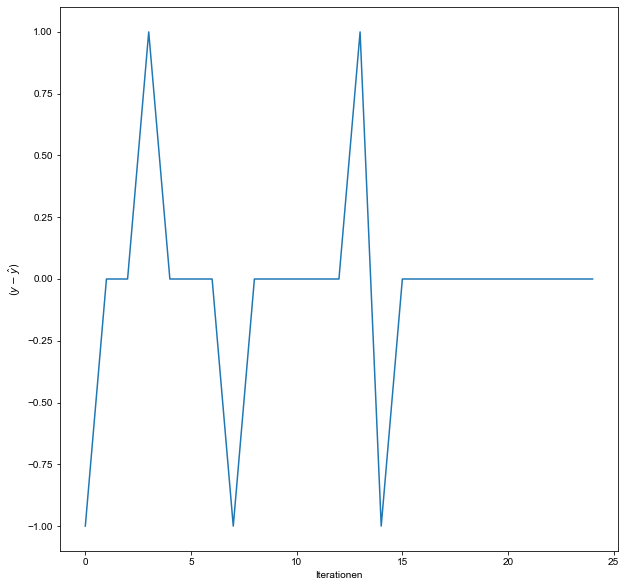

In [1]:
# Grafik
import matplotlib.pyplot as plt
# Zufall
from random import choice
# Mathe
from numpy import array, dot, random, linspace, zeros
# Wichtig!
%matplotlib inline

# Trainingsdaten (input, gewünschte Ausgabe)
# Stelle 0: Bias-Neuron
training_data_set = [
    (array([1,0,0]), 0),
    (array([1,0,1]), 1),
    (array([1,1,0]), 1),
    (array([1,1,1]), 1)
]

# Heaviside als Lambda-Funktion
heaviside = lambda x: 0 if x < 0 else 1

# Initialisierung Zufallsgenerator
random.seed( 18 ) # beliebiger Wert

# Array der Länge 3 mit 0 init
w = zeros(3)
# Anzahl Durchläufe
iterations = 25

# Start Training
def fit(iterations, training_data_set, w):
    """Lernen im Perceptron
        iterations: Ein Vor- und Zurücklauf aller Trainingsbeispiele
        trainings_data_set: Die Beispiele
        w: Startgewichte
    """
    errors = []
    weights = []
    for i in range(iterations):
        # zufälliges Beispiel
        training_data = choice(training_data_set)
        x = training_data[0]
        y = training_data[1]
        # Output berechnen
        # gewichtete Summe + Stufenfunktion
        y_hat = heaviside(dot(w, x))
        # Fehler ermitteln
        error = y - y_hat
        
        # Fehler für Ausgabe sammeln
        errors.append(error)
        # Gewichte für Ausgabe sammeln
        weights.append(w)
        
        # Gewichtsanpassung (x_i entweder 0 oder 1)
        w += error * x
    
    # Rückgabe Fehler und Gewichte
    return errors, weights

# Trainieren
# Sammlung Fehler/Gewichte für grafische Ausgabe
errors, weights = fit(iterations, training_data_set, w)

# letzter Gewichtsvektor
w = weights[iterations - 1]
print("Gewichtsvektor am Ende:")
print((w))

# Auswertung
print("Auswertung:")
for x, y in training_data_set:
    y_hat = heaviside(dot(w, x))
    print("{}: {} -> {}".format(x, y, y_hat))

#-----------------------------------------------------------------

# Grafik
fignr = 1
# Druckgröße in inch
plt.figure(fignr, figsize=(10, 10))
# Fehler als Plot
plt.plot(errors)
# Raster
plt.style.use('seaborn-whitegrid')
# Labels
plt.xlabel('Iterationen')
plt.ylabel(r"$(y - \hat y)$")

# anzeigen
plt.show()

## scikit-learn kompatibler Estimator

[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


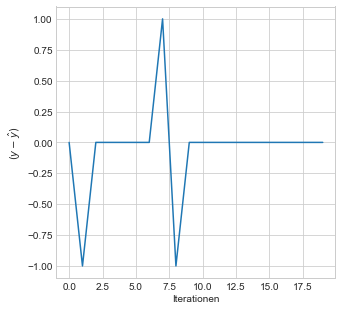

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Datenkonsistenz etc. prüfen
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
# Puffern unterschiedlicher Zielwerte
from sklearn.utils.multiclass import unique_labels
# Wichtig!
%matplotlib inline

class PerceptronEstimator(BaseEstimator, ClassifierMixin):
    # Initialisierung
    def __init__(self, n_iterations=20, random_state=None):
        """Initialisierung der Objekte
            n_iterations: Anzahl der Iterationen für das Lernen
            random_state: für garantierte Wiederholbarkeit: numpy.random.RandomState-Objekt mit Seed konstruieren
        """
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.errors = []
    
    # Stufenfunktion benannt nach Mathematiker & Physiker Heaviside
    def heaviside(self, x):
        """Stufenfunktion
            x: Skalar, für das die Funktion ausgewertet wird
        """
        if x < 0:
            return 0
        else:
            return 1
    
    # Lernen
    def fit(self, X=None, y=None):
        """Trainieren
            X: arrayähnliche Struktur mit [N,D], wobei
                N = Zeilen: Anzahl der Lernbeispiele
                D = Spalten: Anzahl der Features
            y: Array mit [N], mit gleichem N
        """
        # erzeuge Zufallsgenerator
        self.random_state_ = check_random_state(self.random_state)
        # Gewichtsinitialisierung
        # np.size(.,1) = Anzahl Spalten
        self.w = self.random_state_.random_sample(np.size(X,1))
        
        # prüfe auf korrekte shapes: X.shape[0] = y.shape[0]
        X, y = check_X_y(X, y)
        # eindeutige Zielwerte speichern
        self.classes = unique_labels(y)
        # Lerndaten für spätere Prüfung in predict() speichern
        self.X_ = X
        self.y_ = y
        
        # Lernen
        for i in range(self.n_iterations):
            # zufälliger Index
            rand_index = self.random_state_.randint(0,np.size(X,0))
            # zufälliger Inputvektor
            x_ = X[rand_index]
            y_ = y[rand_index]
            # Output ermitteln
            y_hat = self.heaviside(dot(self.w, x_))
            # Fehler berechnen
            error = y_ - y_hat
            
            self.errors.append(error)
            
            #Gewichtsanpassung
            self.w += error * x_
        
        # Rückgabe für verknüpfte Aufrufe
        return self
    
    # Auswerten
    def predict(self, x):
        """Auswerten eines Vektors
            x: Input-Vektor
        """
        # prüfe ob fit() bereits aufgerufen
        check_is_fitted(self, ['X_', 'y_'])
        return self.heaviside(dot(self.w, x))
    
    # Fehler als Plot
    def plot(self):
        """Ausgabe des Fehlers
            als Grafik
        """
        fignr = 1
        plt.figure(fignr, figsize=(5,5))
        plt.plot(self.errors)
        # Raster
        plt.style.use('seaborn-whitegrid')
        # Labels
        plt.xlabel('Iterationen')
        plt.ylabel(r"$(y - \hat y)$")

#---------------------------------------------------------------------

# Trainingsdaten
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
y = np.array([0,1,1,1])

# Lernen
Perceptron = PerceptronEstimator(20,10)
Perceptron.fit(X,y)

# Testdaten
x = np.array([1,0,0])

# Auswertung
for index, x in enumerate(X):
    p = Perceptron.predict(x)
    print("{}: {} -> {}".format(x, y[index], p))

# Graph
Perceptron.plot()

## scikit-learn Perceptron

In [24]:
import numpy as np
# Iris-Dataset
from sklearn.datasets import load_iris
# das fertige Perceptron
from sklearn.linear_model import Perceptron

# Datensatz laden
iris = load_iris()
# Eingabevektoren (150x 5-Dimensional)
X = iris.data[:,(2,3)] # petal length and width
y = iris.target

# Perceptron: random_state = Seed, max_iter = max. Iterationen, tol = Stoppkriterium
Perceptron = Perceptron(random_state=52,max_iter=100000,tol=None)

# Lernen
Perceptron.fit(X, y)

# Auswerten
y_prediction = Perceptron.predict([[1.4,0.2], [3.5,1.0], [6.0,2.5]])

# Ausgabe
print(y_prediction) # erwarte [0 1 2]

[0 1 2]


## Adaline-Lernen

Fehlergraph


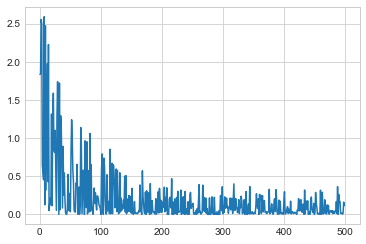

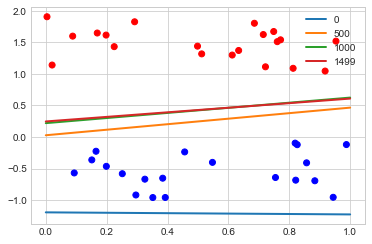

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from random import choice
import math
import sympy
# Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Datenkonsistenz etc. prüfen
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
# Puffern unterschiedlicher Zielwerte
from sklearn.utils.multiclass import unique_labels
# Wichtig!
%matplotlib inline

class AdalineEstimator(BaseEstimator, ClassifierMixin):
    # Initialisierung
    def __init__(self, eta=.001, n_iterations=500, random_state=None):
        """Initialisierung der Objekte
            eta:Lernrate
            n_iterations: Anzahl der Iterationen für das Lernen
            random_state: für garantierte Wiederholbarkeit: numpy.random.RandomState-Objekt mit Seed konstruieren
        """
        self.eta = eta
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.errors = []
        self.w = []
        # alle Gewichte für Plot
        self.wAll = []
    
    # gewichteter Input
    def net_i(self, x):
        """Den gewichteten Input w * x berechnen
            x: ein Vektor
        """
        return np.dot(x, self.w)
    
    # Aktivierungsfunktion
    def activation(self, x):
        """Lineare Aktivierungsfunktion
        """
        return self.net_i(x)
    
    # Output-Funktion
    def output(self, x):
        """Outputfunktion
        """
        if self.activate(x) >= 0.0:
            return 1
        else:
            return -1
    
    # Lernen
    def fit(self, X=None, y=None):
        """Trainieren
            X: arrayähnliche Struktur mit [N,D], wobei
                N = Zeilen: Anzahl der Lernbeispiele
                D = Spalten: Anzahl der Features
            y: Array mit [N], mit gleichem N
        """
        # erzeuge Zufallsgenerator
        self.random_state_ = check_random_state(self.random_state)
        # Gewichtsinitialisierung
        # np.size(.,1) = Anzahl Spalten
        self.w = self.random_state_.random_sample(np.size(X,1))
        
        # prüfe auf korrekte shapes: X.shape[0] = y.shape[0]
        X, y = check_X_y(X, y)
        # Lerndaten für spätere Prüfung in predict() speichern
        self.X_ = X
        self.y_ = y
        
        # Lernen mit Gradientenabstieg
        for i in range(self.n_iterations):
            # zufälliger Index
            rand_index = self.random_state_.randint(0,np.size(X,0))
            # zufälliger Inputvektor
            x_ = X[rand_index]
            y_ = y[rand_index]
            # Net Input ermitteln
            net_j = np.dot(x_, self.w)
            # Fehler berechnen
            error = (y_ - net_j)**2
            
            self.errors.append(error)
            
            # Online-Learning
            for j in range(3):
                weight = {}
                self.w[j] += self.eta * x_[j] * (y_ - net_j)
                weight[0] = self.w[0]
                weight[1] = self.w[1]
                weight[2] = self.w[2]
                self.wAll.append(weight) # 3 * nr_iterations
        
        # Rückgabe für verknüpfte Aufrufe
        return self
    
    # Auswerten
    def predict(self, x):
        """Auswerten eines Vektors
            x: Input-Vektor
        """
        # prüfe ob fit() bereits aufgerufen
        check_is_fitted(self, ['X_', 'y_'])
        return self.output(x)
    
    # Ausgabe als Plot
    def plot(self):
        """Ausgabe als Grafik
        """
        x1 = []
        x2 = []
        colors = []
        
        for i in range(self.X_.shape[0]):
            x1.append(self.X_[i][1])
            x2.append(self.X_[i][2])
            y = self.y_[i]
            if y == 1:
                colors.append('r') # rot
            else:
                colors.append('b') # blau
        
        # Errors
        print("Fehlergraph")
        plt.plot(self.errors)
        # Learning curve
        plt.figure(1)
        plt.show()
        
        # Scatter
        plt.figure(2)
        plt.scatter(x1, x2, c=colors)
        
        # Result Line
        x1Line = np.linspace(0.0, 1.0, 2)
        x2Line = lambda x1, w0, w1, w2: (-x1*w1 - w0) / w2
        alpha = 0.0
        for idx, weight in enumerate(self.wAll):
            # alpha = Transparenz
            if (idx % 500 == 0):
                alpha = 1.0 #( idx / len(self.wAll) )
                plt.plot(x1Line, x2Line(x1Line, weight[0], weight[1], weight[2]),
                         alpha=alpha, linestyle='solid', label=str(idx), linewidth=2.0)
        
        # Ergebnisgerade
        plt.plot(x1Line, x2Line(x1Line, weight[0], weight[1], weight[2]),
                 alpha=alpha, linestyle='solid', label=str(idx), linewidth=2.0)
        plt.legend(loc='best', shadow=True)

### MAIN ### -----------------------------------------------------------------------------------

random_state = check_random_state(10)
I = []
o = []

# Datensatz aufbauen
for x in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, x, y+1.0])
    o.append(1)

for x in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, x, y-1.0])
    o.append(-1)

# NumPy Array bauen
X = np.array(I)
y = np.array(o)

Adaline = AdalineEstimator(eta=.01, n_iterations=500, random_state=10)
Adaline.fit(X, y)

Adaline.plot()